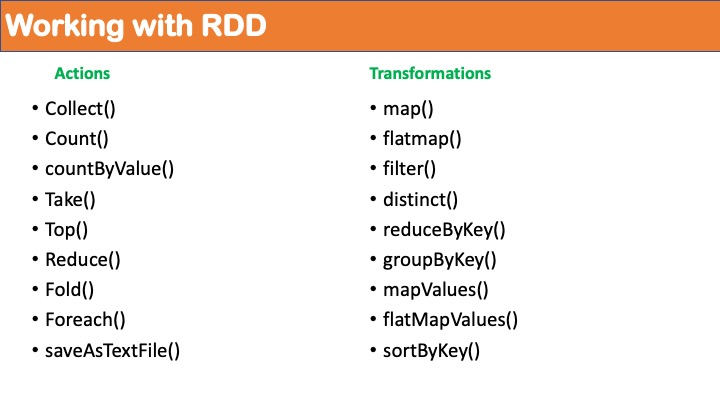

In [1]:
from IPython.display import Image
Image(filename='RDD_Actions_Transformations.jpg')

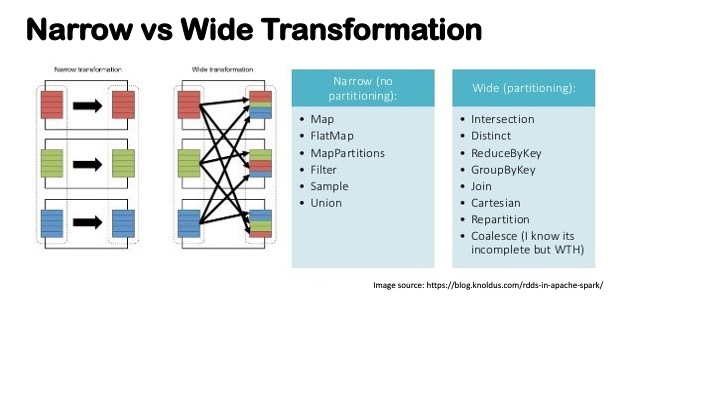

In [2]:
from IPython.display import Image
Image(filename='Narrow_wide.jpg')

In [3]:
from pyspark import SparkContext, SparkConf

In [4]:
conf = SparkConf().setAppName("NarrowWideTrans").setMaster("local")
sc = SparkContext(conf=conf)

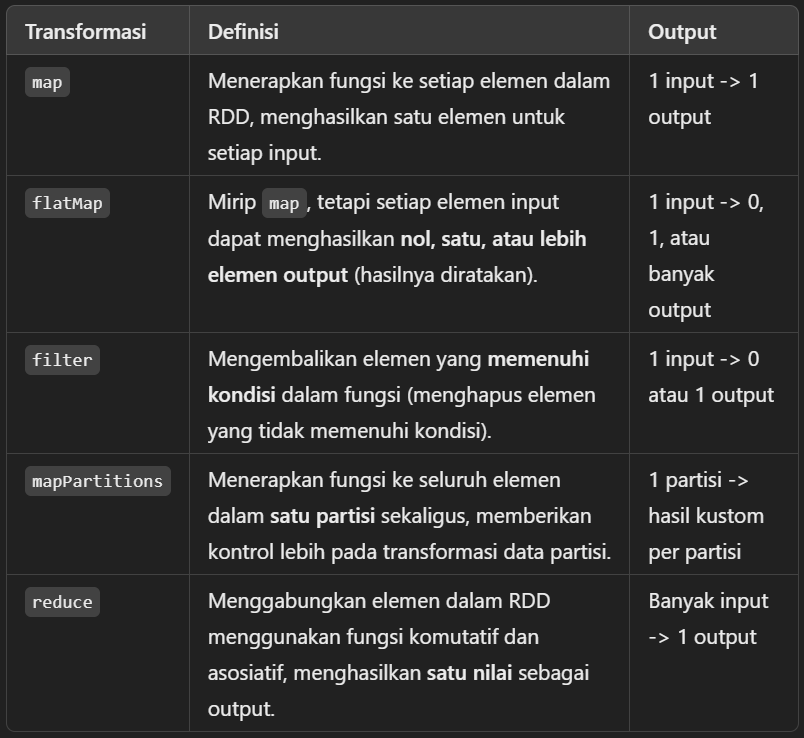

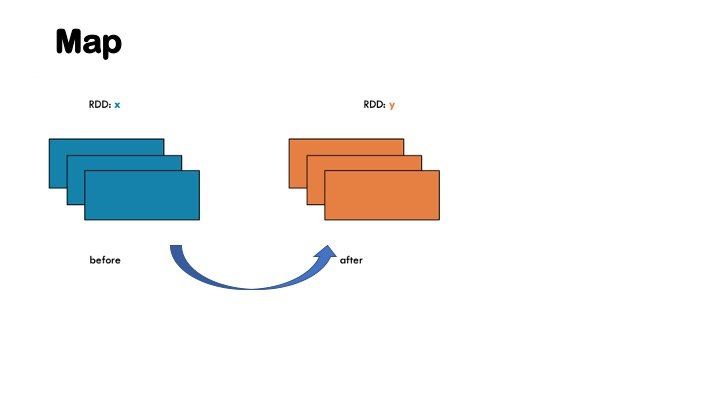

In [5]:
Image(filename='Map.jpg')

In [97]:
num = sc.parallelize([5,5,4,3,2,9,2])
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [98]:
# import numpy as np
# (np.array(num.collect())*2).tolist()

In [99]:
num.map(lambda a : a*2).collect()

[10, 10, 8, 6, 4, 18, 4]

In [100]:
num.map(lambda a : pow(a,2)).collect()

[25, 25, 16, 9, 4, 81, 4]

In [101]:
list(map(lambda x: [x,x**2], num.collect()))

[[5, 25], [5, 25], [4, 16], [3, 9], [2, 4], [9, 81], [2, 4]]

In [102]:
names = sc.parallelize([ "Bills", "Mark","Brain","Mick"])

In [103]:
names.map(lambda a : "Mr. "+ a).collect()

['Mr. Bills', 'Mr. Mark', 'Mr. Brain', 'Mr. Mick']

In [104]:
pairs = sc.parallelize([(1, 2), (3, 4), (5, 6)])

# Using lambda to add elements in tuple
result = pairs.map(lambda x: x[0] + x[1]).collect()
print(result)

[3, 7, 11]


In [105]:
# Unpacking tuple in map

result = pairs.map(lambda x: (x[0] * 2, x[1] * 2)).collect()
print(result)

[(2, 4), (6, 8), (10, 12)]


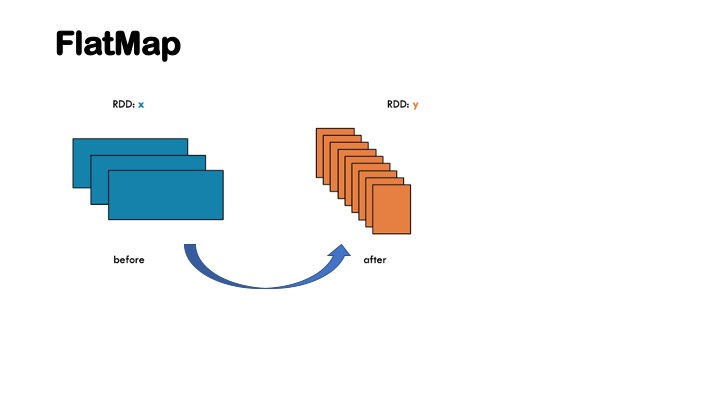

In [106]:
Image(filename='FlatMap.jpg')

In [107]:
rdd = sc.parallelize([2,3,4])
rdd.collect()

[2, 3, 4]

In [108]:
a = range(1,3)
for i in a:
    print(i)

1
2


In [109]:
rdd.map(lambda x: range(1, x)).collect()

[range(1, 2), range(1, 3), range(1, 4)]

In [110]:
rdd.flatMap(lambda x: range(1, x)).collect()

[1, 1, 2, 1, 2, 3]

In [111]:
rdd.flatMap(lambda x: (x,x*2)).collect()

[2, 4, 3, 6, 4, 8]

In [112]:
a = sc.parallelize([1,2,3],3)

In [113]:
a.flatMap(lambda x: (x,x*10,57)).collect()

[1, 10, 57, 2, 20, 57, 3, 30, 57]

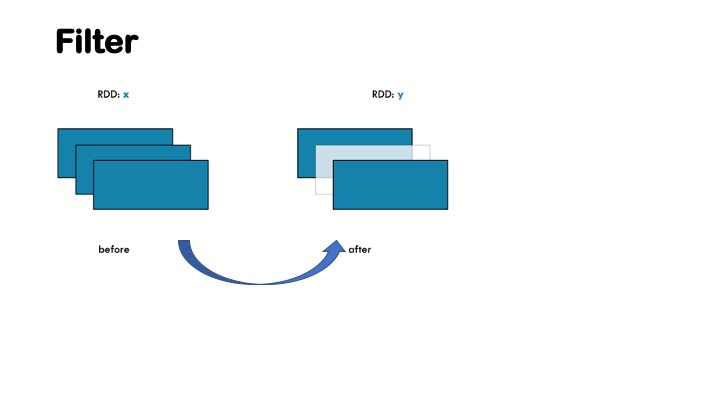

In [114]:
Image(filename='Filter.jpg')

In [115]:
# num = sc.parallelize([2,3,4,5],6)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [ ]:
num.filter(lambda x: x%2 == 0).collect()

[2, 4]

In [92]:
names.collect()
list(filter(lambda x: x[0] != 'B', names.collect()))

['Mark', 'Mick']

In [93]:
names.filter(lambda x : "B" in x).collect()

['Bills', 'Brain']

---

#### mapPartitions

In [140]:
number = sc.parallelize([1,2,3,4,5,6,7,8,9,10,10],13)

In [141]:
number.mapPartitions(lambda partition: [x*2 for x in partition]).collect()

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 20]

In [ ]:
# generator expression
number.mapPartitions(lambda partition: (x*2 for x in partition)).collect()

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 20]

In [ ]:
# generator expression
gen =(x**2 for x in range(5))
print(gen)  # Output: <generator object <genexpr> at 0x...>
print(list(gen))  # Output: [0, 1, 4, 9, 16]
print("-----------------")


# List comprehension
result = [x**2 for x in range(5)]
print(result)

# Set comprehension
result = {x**2 for x in range(5)}
print(result)
print("-----------------")

# There is no tuple comprehension, but you can use generator expression
# Generators produce elements when called/required (lazy evaluation)

<generator object <genexpr> at 0x000001F35ACAAB20>
[0, 1, 4, 9, 16]
-----------------
{0, 1, 4, 9, 16}
-----------------
[0, 1, 4, 9, 16]


In [143]:
number.mapPartitions(lambda partition: {x*2 for x in partition}).collect()

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 20]

#### aggregate

In [150]:
rdd = sc.parallelize([1, 2, 3, 4, 5], numSlices=2)

result = rdd.aggregate(
    (0, 0),  # Nilai awal: (sum, sum_of_squares)
    lambda acc, x: (acc[0] + x, acc[1] + x**2),  # seqOp: Dalam partisi
    lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])  # combOp: Antar partisi
)

print(result)  # Output: (15, 55)

(15, 55)


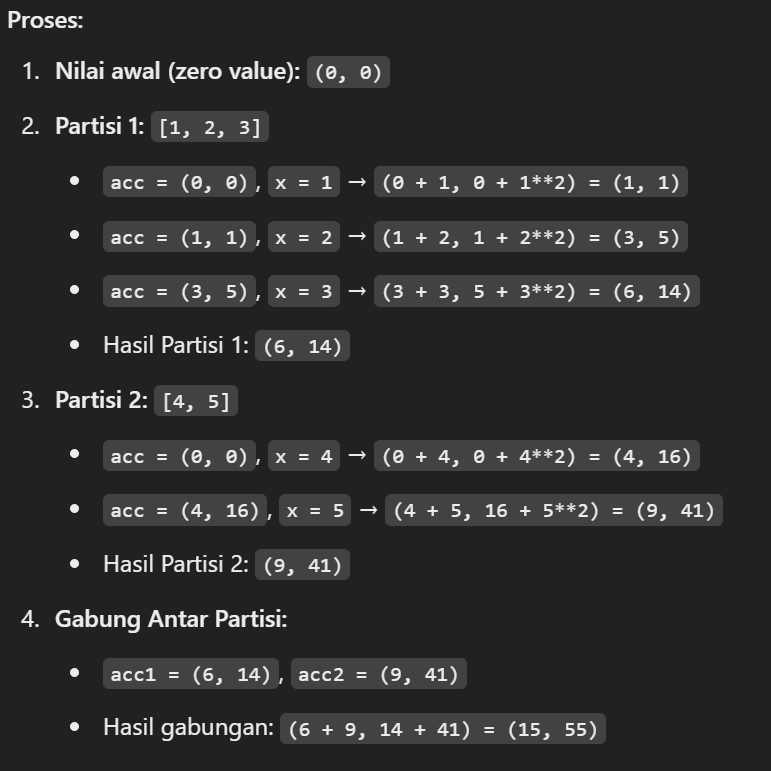

---

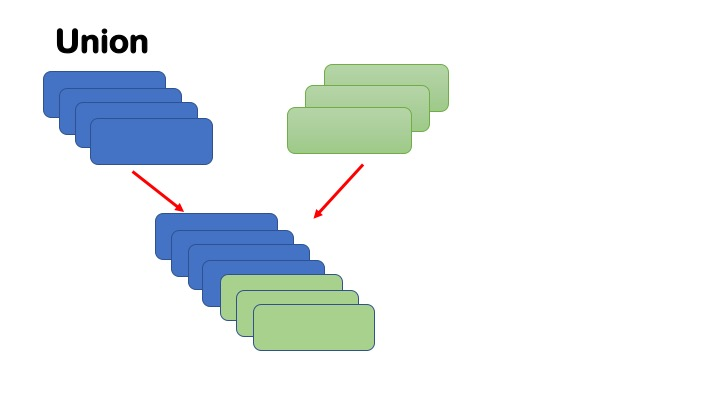

In [49]:
Image(filename='Union.jpg')

In [151]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [155]:
num2 = sc.parallelize([1,7,9,4,10,15])
num2.collect()

[1, 7, 9, 4, 10, 15]

In [156]:
num2.union(num).collect()

[1, 7, 9, 4, 10, 15, 5, 5, 4, 3, 2, 9, 2]

In [157]:
num.union(num2).collect()

[5, 5, 4, 3, 2, 9, 2, 1, 7, 9, 4, 10, 15]

In [158]:
x = sc.parallelize([1,2,3], 2)
y = sc.parallelize([3,4], 1)

In [159]:
z = x.union(y)
z.collect()

[1, 2, 3, 3, 4]

#### sample

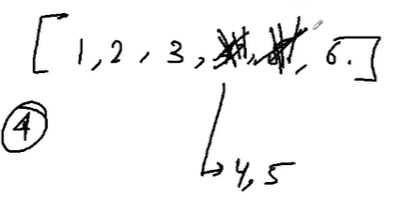

In [161]:
Image(filename='Sample.jpg') # -> Narrow Transformation

In [ ]:
# sample: Return a random sample subset RDD of the input RDD
# API: (withReplacement: Boolean, fraction: Double, seed: Long = Utils.random.nextLong): RDD[T]
# Note This is not guaranteed to provide exactly the fraction specified of the total count of the given


In [221]:
parallel = sc.parallelize(range(1,10))
parallel.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [222]:
# help(parallel.sample)

    Parameters
    ----------
    withReplacement : bool
        can elements be sampled multiple times (replaced when sampled out)
    fraction : float
        expected size of the sample as a fraction of this RDD's size
        without replacement: probability that each element is chosen; fraction must be [0, 1]
        with replacement: expected number of times each element is chosen; fraction must be >= 0
    seed : int, optional
        seed for the random number generator

In [245]:
parallel.sample(True,.2).collect()

[3, 9, 9]

In [246]:
parallel.sample(True,.2,seed=19).collect()

[2, 4, 6, 9]

In [256]:
parallel.sample(False,.2).collect()

[2, 4, 5, 7]

In [186]:
parallel.sample(True,.2).collect()

[4, 4]

In [193]:
parallel.sample(False,.2,seed=23).collect()

[4, 5]

In [194]:
parallel.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Wide Transformation

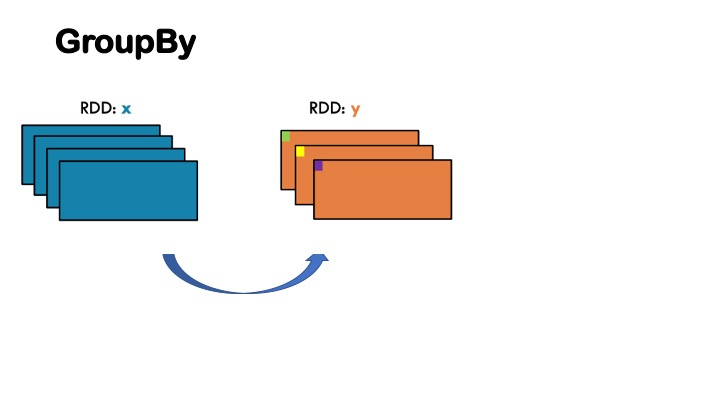

In [259]:
Image(filename='GroupBy.jpg')

In [278]:
names = sc.parallelize(['Bills', 'Mark', 'Brain', 'Mick', 'Mich'])

In [279]:
names.collect()

['Bills', 'Mark', 'Brain', 'Mick', 'Mich']

In [303]:
names_gr = names.groupBy(lambda x : x[0:1]).collect()

In [304]:
names_gr

[('B', <pyspark.resultiterable.ResultIterable at 0x1f35ad2abc0>),
 ('M', <pyspark.resultiterable.ResultIterable at 0x1f35ad2d7e0>)]

In [305]:
for (k,v) in names_gr:
    print(k,list(v), v)

B ['Bills', 'Brain'] <pyspark.resultiterable.ResultIterable object at 0x000001F35AD2ABC0>
M ['Mark', 'Mick', 'Mich'] <pyspark.resultiterable.ResultIterable object at 0x000001F35AD2D7E0>


In [306]:
names_gr = names.groupBy(lambda x : x[0:2]).collect()
names_gr

[('Bi', <pyspark.resultiterable.ResultIterable at 0x1f35ad2aef0>),
 ('Ma', <pyspark.resultiterable.ResultIterable at 0x1f35ad2cc70>),
 ('Br', <pyspark.resultiterable.ResultIterable at 0x1f35ad2d150>),
 ('Mi', <pyspark.resultiterable.ResultIterable at 0x1f35ad2c160>)]

In [307]:
for (k,v) in names_gr: # -> the result is like a key-value pair
    print(k,list(v), type(v))

Bi ['Bills'] <class 'pyspark.resultiterable.ResultIterable'>
Ma ['Mark'] <class 'pyspark.resultiterable.ResultIterable'>
Br ['Brain'] <class 'pyspark.resultiterable.ResultIterable'>
Mi ['Mick', 'Mich'] <class 'pyspark.resultiterable.ResultIterable'>


In [308]:
aa = sc.parallelize([1, 1, 2, 3, 5, 8])


In [309]:
result = aa.groupBy(lambda x: x % 2).collect()

In [310]:
result

[(1, <pyspark.resultiterable.ResultIterable at 0x1f35acfa980>),
 (0, <pyspark.resultiterable.ResultIterable at 0x1f35ad2dcf0>)]

x % 2 -> The way to read it is with the expression x%2, which has the same result will be grouped.

In [311]:
for (k,v) in result:
    print(k, list(v) )

1 [1, 1, 3, 5]
0 [2, 8]


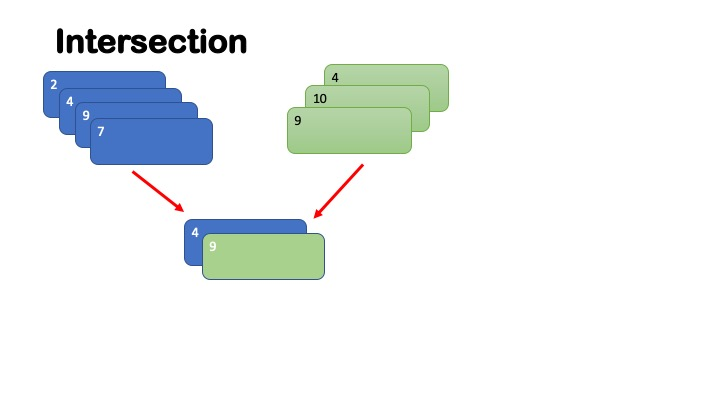

In [312]:
Image(filename='Intersection.jpg')

In [318]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [319]:
num2.collect()

[1, 7, 9, 4, 10, 15]

In [315]:
num.intersection(num2).collect()

[4, 9]

In [316]:
num2.intersection(num).collect()

[4, 9]

#### subtract

In [ ]:
num.subtract(num2).collect()
# num - num2, only the elements in num but not in num2

[2, 2, 5, 5, 3]

In [ ]:
num2.subtract(num).collect()
# num2 - num, only the elements in num2 but not in num

[10, 1, 7, 15]

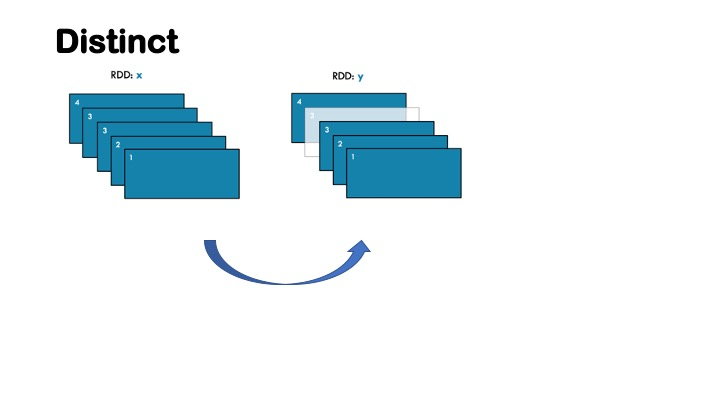

In [322]:
Image(filename='Distinct.jpg')

In [323]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [326]:
num.distinct().collect()
# remove the duplicate elements

[5, 4, 3, 2, 9]

In [ ]:
# Join